In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
import pandas as pd
from scipy.optimize import curve_fit

plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = (10,8)

In [35]:
def linear(x,m,n):
    return m*x+n

<h1> O9 Interferenzen gleicher Dicke </h1>
Simon Legtenborg, Leonie Parsiegel

<h2>Aufgabe 1</h2>
<p>Bestimmen Sie den Krümmungsradius einer konvexen Linsenfläche durch Ausmessen Newtonscher
Ringe unter Verwendung von Licht bekannter Wellenlänge.</p>

Der Zusammenhang zwischen Radius k und zugehörigen Interferenzring ist:
$$r_k² = \left( k- \frac{1}{2} \right) R \lambda -2d_0R $$
Die Steigung beträgt:
$$m = R \cdot \lambda$$
Das bedeutet:
$$R = \frac{m}{\lambda}$$
$$\Delta R = \sqrt{\left(\frac{\Delta m}{\lambda}\right)^2+ \left( \frac{m \cdot \Delta \lambda}{\lambda^2} \right)^2}$$

In [36]:
#Daten einlesen
l1 = 589*10**-9
dl1 = 10*10**-9

DF1 = pandas.DataFrame()
DF1 = pd.read_csv("a1.csv", delimiter=";")
k1 = DF1["k"].to_numpy()
r_k1 = DF1["d"].to_numpy()/2*10**(-3)
print(DF1)

     k       d
0    1  0.7608
1    2  1.3277
2    3  1.7068
3    4  2.0352
4    5  2.3075
5    6  2.5649
6    7  2.7651
7    8  2.9819
8    9  3.1572
9   10  3.3443
10  11  3.5175


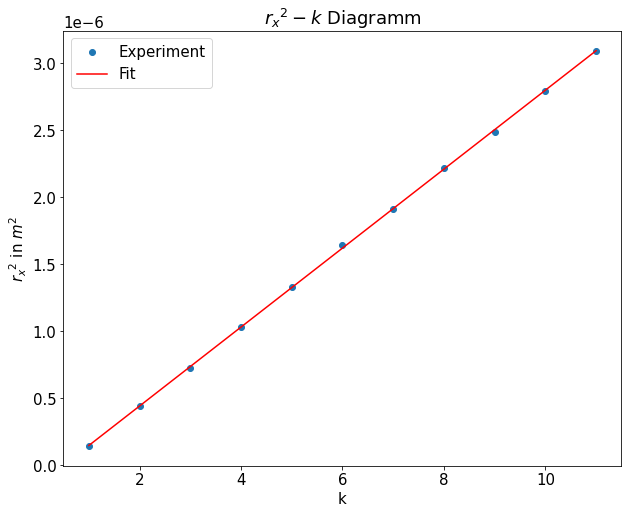

In [37]:
#Diagramme mit Fit plotten
s1, cov1 = curve_fit(linear, k1, r_k1**2)

plt.scatter(k1, r_k1**2, label="Experiment")
plt.plot(k1, linear(k1,s1[0],s1[1]), label="Fit", color="red")

plt.xlabel("k")
plt.ylabel("${r_x}^2$ in $m^2$")

plt.legend()
plt.title("${r_x}^2-k$ Diagramm")
plt.show()

In [38]:
#Werte ausgeben
m1 = np.round(s1[0],8)
dm1 = np.round(np.sqrt(cov1[0,0]),10)

R1 = np.round(m1/l1,3)
dR1 = np.round(np.sqrt((dm1/l1)**2+(m1*dl1/l1**2)**2),3)


print(f"Die Steigung der Kurve beträgt: {m1} +- {dm1}")
print(f"Der Radius der Linse beträgt: {R1} +- {dR1} m")

Die Steigung der Kurve beträgt: 2.9e-07 +- 1e-09
Der Radius der Linse beträgt: 0.492 +- 0.009 m


<h2>Aufgabe 2</h2>
<p>Bestimmen Sie mit der Anordnung von Aufgabe 1 die Wellenlänge des durch einen
Interferenzfilter tretenden Lichts.</p>

Für die Aufgabe gilt die gleiche Gleichung wie in Aufgabe 1.<br>
Für unsere neue Messgröße gilt:
$$\lambda = \frac{m}{R}$$
$$\Delta \lambda = \sqrt{\left(\frac{\Delta m}{R}\right)^2+ \left( \frac{m \cdot \Delta R}{R^2} \right)^2}$$


In [39]:
#Daten einlesen
R2 = R1
dR2 = dR1

DF2 = pandas.DataFrame()
DF2 = pd.read_csv("a2.csv", delimiter=";")
k2 = DF2["k"].to_numpy()
r_k2 = DF2["d"].to_numpy()/2*10**-3
print(DF2)

     k       d
0    1  1.0317
1    2  1.4604
2    3  1.8392
3    4  2.1231
4    5  2.3795
5    6  2.5828
6    7  2.8020
7    8  2.9884
8    9  3.1718
9   10  3.3477
10  11  3.4984


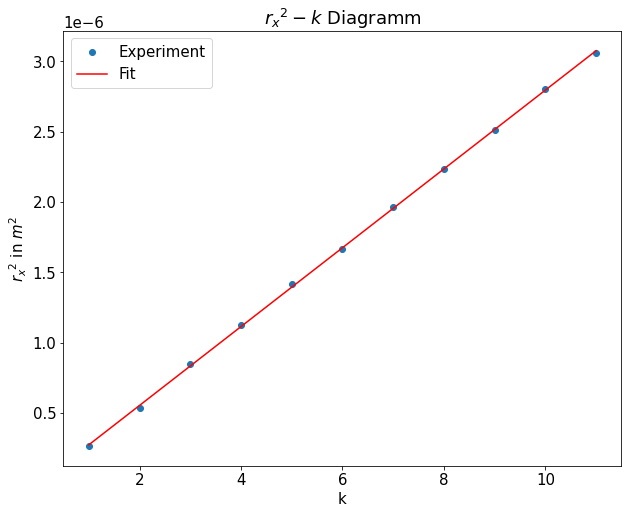

In [40]:
#Diagramme mit Fit plotten
s2, cov2 = curve_fit(linear, k2, r_k2**2)

plt.scatter(k2, r_k2**2, label="Experiment")
plt.plot(k1, linear(k2,s2[0],s2[1]), label="Fit", color="red")

plt.xlabel("k")
plt.ylabel("${r_x}^2$ in $m^2$")

plt.legend()
plt.title("${r_x}^2-k$ Diagramm")
plt.show()

In [41]:
#Werte ausgeben
m2 = np.round(s2[0],8)
dm2 = np.round(np.sqrt(cov2[0,0]),9)

l2 = np.round(m2/R2,9)
dl2 = np.round(np.sqrt((dm2/R2)**2+(m2*dR2/R2**2)**2),9)

print(f"Die Steigung der Kurve beträgt: {m2} +- {dm2}")
print(f"Die Wellenlänge beträgt: {l2*10**9} +- {dl2*10**9}nm")

Die Steigung der Kurve beträgt: 2.8e-07 +- 1e-09
Die Wellenlänge beträgt: 569.0 +- 11.0nm


<h2>Aufgabe 3</h2>
<p>Ermitteln Sie durch Interferenzen an dünnen Schichten die Dicke einer Folie oder den Durchmesser
eines Drahtes.</p>

Für Interferenz an dünnen Schichten gilt für helle Streifen:
$$x_k=\frac{l \cdot \lambda}{2D}k-\frac{l \cdot \lambda}{4D}$$

Mit der Steigung:
$$m = \frac{l \cdot \lambda}{2D}$$
Daraus folgt:
$$D= \frac{l \cdot \lambda}{2m}$$
$$\Delta D = \sqrt{\left( \frac{\lambda \cdot \Delta l}{2m}\right)^2+ \left( \frac{l \cdot \Delta \lambda}{2m} \right)^2+\left( \frac{l \cdot \lambda \cdot \Delta m}{2m^2} \right)}$$

In [42]:
#Daten einlesen
L3=2.52*10**-2
dL3=0.01*20**-2

l3 = l2
dl3 = dl2

DF3 = pandas.DataFrame()
DF3 = pd.read_csv("a3.csv", delimiter=";")
k3 = DF3["k"].to_numpy()
x_k3 = DF3["xk"].to_numpy()*10**-3

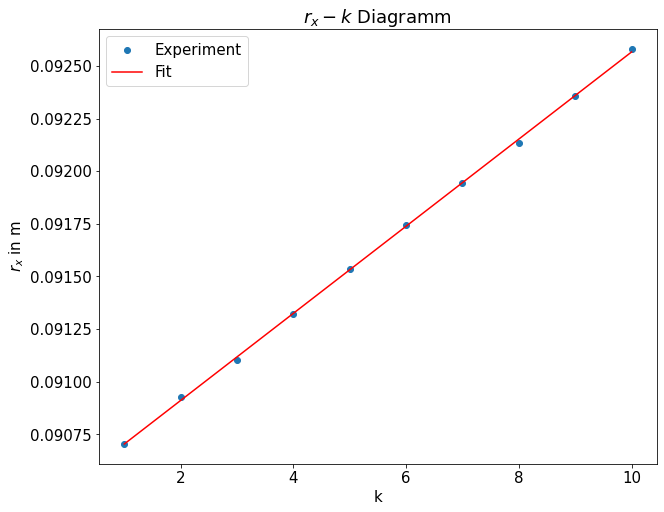

In [43]:
#Diagramme mit Fit plotten
s3, cov3 = curve_fit(linear, k3, x_k3)

plt.scatter(k3, x_k3, label="Experiment")
plt.plot(k3, linear(k3,s3[0],s3[1]), label="Fit", color="red")

plt.xlabel("k")
plt.ylabel("${r_x}$ in m")

plt.legend()
plt.title("${r_x}-k$ Diagramm")
plt.show()

In [44]:
#Werte ausgeben
m3 = np.round(s3[0],8)
dm3 = np.round(cov3[0,0],2)

D3 = L3*l3/(2*m3)
dD3 = np.sqrt((l3*dL3/(2*m3))**2+(L3*dl3/(2*m3))**2+(L3*l3*dm3/(2*m3**2))**2)

print(f"Die Steigung der Kurve beträgt: {m3} +- {dm3}")
print(f"Die Dicke beträgt: {D3*10**3} +- {dD3*10**3}mm")

Die Steigung der Kurve beträgt: 0.00020697 +- 0.0
Die Dicke beträgt: 0.034639802869981154 +- 0.0006705434370407294mm


Für dunkle newtonsche Ringe gilt:
$${r_k}^2=(k-1)R\lambda-2d_0R$$

Für dunkle  Streifen gilt:
$$x_k=\frac{l \cdot \lambda}{2D}k-\frac{l \cdot \lambda}{2D}$$